In [1]:
# Import the required libraries and modules
import copy
import string
import collections
import re
import pandas as pd
import numpy as np
import wordcloud
import nltk
from nltk import stem
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import random as rd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
# This code downloads from nltk the list of stop words in a list
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

def tokenize(doc):
    # This function is used for counting the frequency of words
    text = doc.lower().strip()
    text = re.sub(f'[{string.punctuation}]', " ", text)
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

def get_token_counts(token_list):
    token_counter = collections.Counter([txt.lower() for txt in token_list])
    return dict(sorted(token_counter.items(), key=lambda item: item[1], reverse=True))

def generate_wordcloud(frequencies, path):
    cloud = wordcloud.WordCloud(width=800, height=400, background_color = 'white')
    cloud.generate_from_frequencies(frequencies)

    cloud.to_file(path)
    print("FILE GENERATED:", path)


    plt.interactive(True)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')

    plt.title('Word Cloud: ' + path,fontweight="bold")
    plt.show()

[nltk_data] Downloading package stopwords to /home/mihof/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FILE GENERATED: /home/mihof/data/sentiment/Anxiety.png


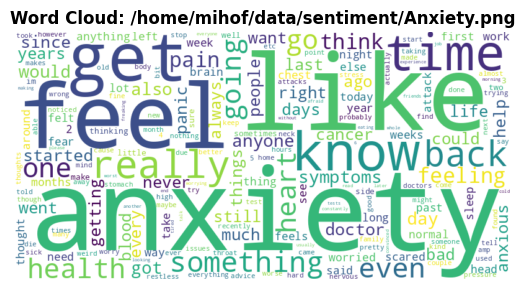

FILE GENERATED: /home/mihof/data/sentiment/Normal.png


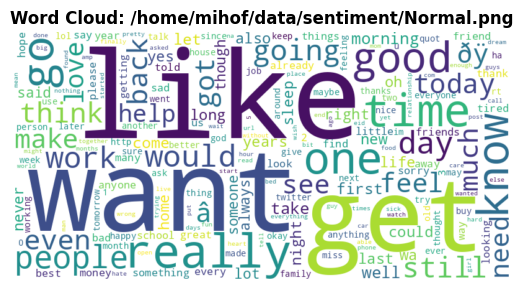

FILE GENERATED: /home/mihof/data/sentiment/Depression.png


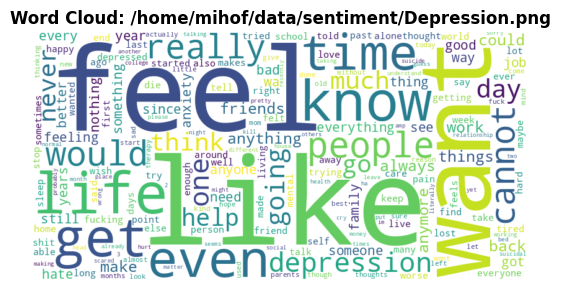

FILE GENERATED: /home/mihof/data/sentiment/Suicidal.png


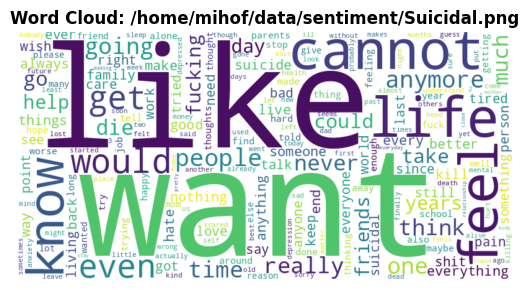

FILE GENERATED: /home/mihof/data/sentiment/Stress.png


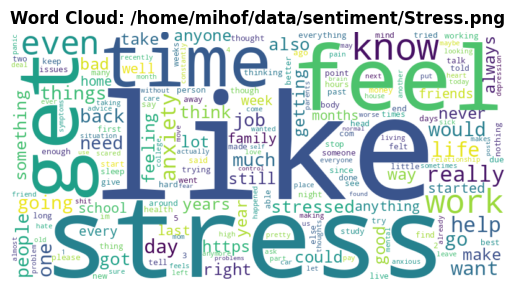

FILE GENERATED: /home/mihof/data/sentiment/Bipolar.png


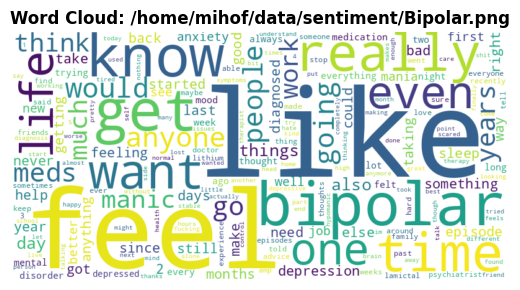

FILE GENERATED: /home/mihof/data/sentiment/Personality disorder.png


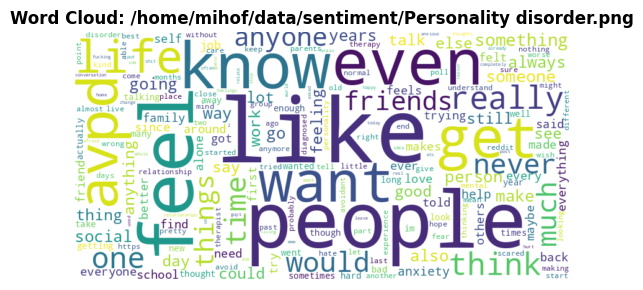

In [3]:
df = pd.read_csv("/home/mihof/data/Combined Data.csv")

# drop null statement
df = df.dropna(subset='statement')

df = df[['statement', 'status']]

statements = []
# Convert the DataFrame to a list of lists and extend reviews_corpus
statement_sentiment_pairs =  df.values.tolist()
statements.extend(statement_sentiment_pairs)

for status in df['status'].unique().tolist():
    # selected_statements = [statement for statement in statements if statements == 'Anxiety']
    selected_statements = [statement for statement in statements if statement[1] == status]
    statement_txt = [statement[0] for statement in selected_statements]

    text = " ".join(statement_txt)

    tokens = tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]

    # stemming
    # porterstem = stem.PorterStemmer()
    # tokens = [porterstem.stem(x) for x in tokens]
    # tokens = remove_stopwords(tokens)

    tkn_count_dict = get_token_counts(tokens)

    generate_wordcloud(tkn_count_dict, f'/home/mihof/data/sentiment/{status}.png')